In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset contains different cases of loan applications consisting of personal and financial features. The dataset can be used to analyse what factors cause people to default loans. We can also prepare a predictive model to prodict wheter to give an individual a loan or not.

# Features Description

In [3]:
df = pd.read_csv("fraud_loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df["Loan_ID"].nunique()

614

The loan ID contains unique values of loan application number, and it doesn't contain any useful data for our purposes so let's drop it for now

In [7]:
df.drop("Loan_ID",axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Male      489
Female    112
Name: Gender, dtype: int64

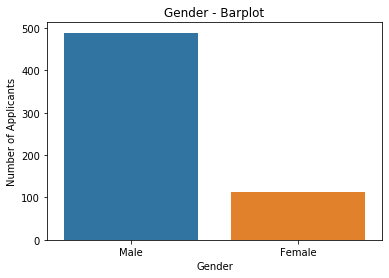

In [9]:
sns.countplot(df["Gender"])
plt.ylabel('Number of Applicants')
plt.title('Gender - Barplot')
df['Gender'].value_counts()

Most of the applicants are male

Yes    398
No     213
Name: Married, dtype: int64

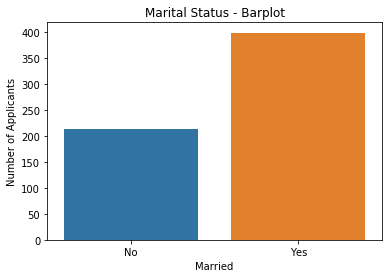

In [10]:
sns.countplot(df["Married"])
plt.ylabel('Number of Applicants')
plt.title('Marital Status - Barplot')
df['Married'].value_counts()

Most of the loan applicants are married

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

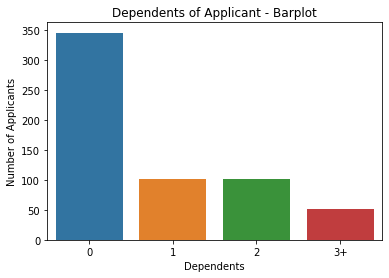

In [11]:
sns.countplot(df["Dependents"])
plt.ylabel('Number of Applicants')
plt.title('Dependents of Applicant - Barplot')
df['Dependents'].value_counts()

Majority of loan applicants have no dependents

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

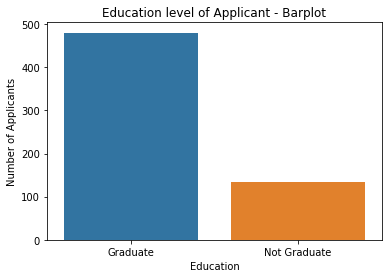

In [12]:
sns.countplot(df["Education"])
plt.ylabel('Number of Applicants')
plt.title('Education level of Applicant - Barplot')
df['Education'].value_counts()

Majority of loan applicants are graduates

No     500
Yes     82
Name: Self_Employed, dtype: int64

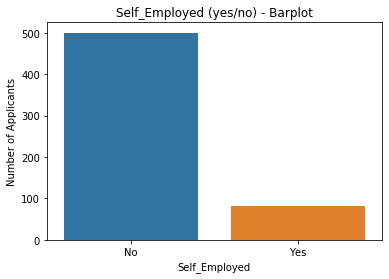

In [13]:
sns.countplot(df["Self_Employed"])
plt.ylabel('Number of Applicants')
plt.title('Self_Employed (yes/no) - Barplot')
df['Self_Employed'].value_counts()

Majority of loan applicants are not self employed

Text(0.5, 1.0, 'Applicant Income - Histogram')

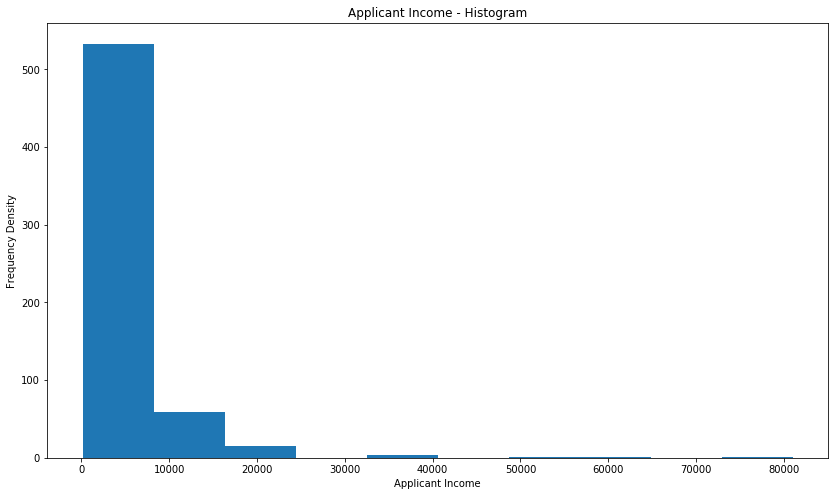

In [14]:
plt.figure(figsize=(14,8))
plt.hist(df["ApplicantIncome"])
#plt.xticks(rotation = 90)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency Density')
plt.title('Applicant Income - Histogram')

Majority of the loan applicants have low incomes

Text(0.5, 1.0, 'Coapplicant Income - Histogram')

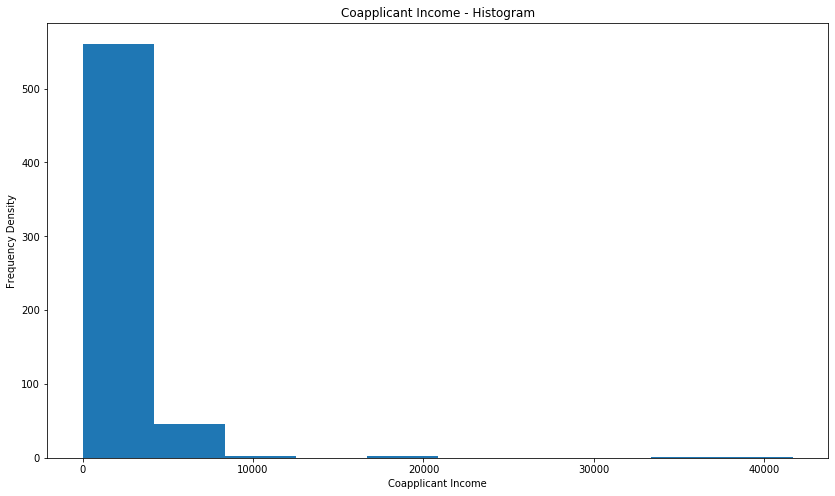

In [15]:
plt.figure(figsize=(14,8))
plt.hist(df["CoapplicantIncome"])
#plt.xticks(rotation = 90)
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency Density')
plt.title('Coapplicant Income - Histogram')

Majority of the loan coapplicants have low incomes

Text(0.5, 1.0, 'Loan Amount - Histogram')

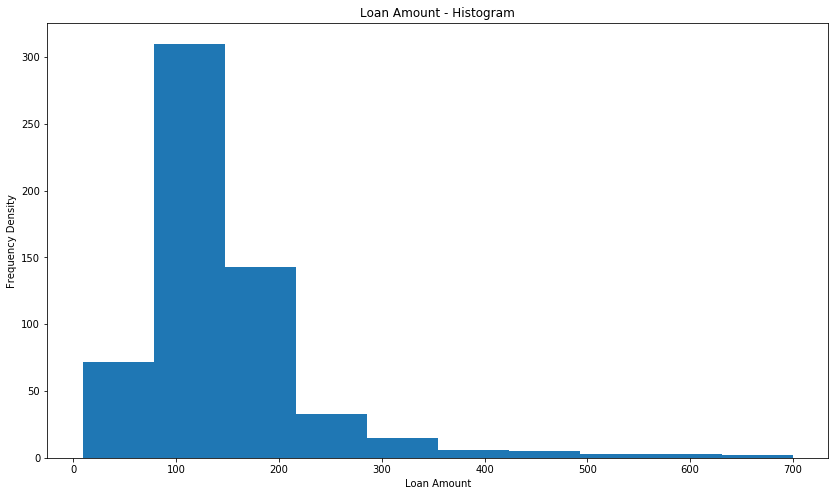

In [17]:
plt.figure(figsize=(14,8))
plt.hist(df["LoanAmount"])
#plt.xticks(rotation = 90)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency Density')
plt.title('Loan Amount - Histogram')

Very few applicants have applied for bigger loans

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

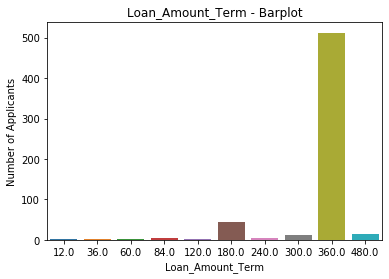

In [18]:
sns.countplot(df["Loan_Amount_Term"])
plt.ylabel('Number of Applicants')
plt.title('Loan_Amount_Term - Barplot')
df['Loan_Amount_Term'].value_counts()

Majority of loan requests are for a one year period

1.0    475
0.0     89
Name: Credit_History, dtype: int64

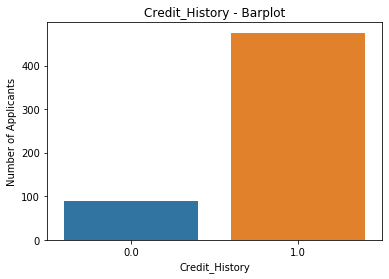

In [20]:
sns.countplot(df["Credit_History"])
plt.ylabel('Number of Applicants')
plt.title('Credit_History - Barplot')
df['Credit_History'].value_counts()

Majority of the loan applicants have credit history 1

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

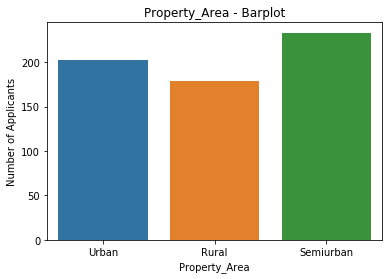

In [21]:
sns.countplot(df["Property_Area"])
plt.ylabel('Number of Applicants')
plt.title('Property_Area - Barplot')
df['Property_Area'].value_counts()

Most of the loans are requested against semiurban prperties

Y    422
N    192
Name: Loan_Status, dtype: int64

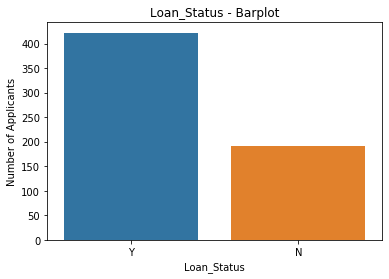

In [22]:
sns.countplot(df["Loan_Status"])
plt.ylabel('Number of Applicants')
plt.title('Loan_Status - Barplot')
df['Loan_Status'].value_counts()

Almost one third of the loan requests have been declined

Bivariate analysis

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Text(0.5, 1.0, 'Loan_Status as per Property_Area - Barplot')

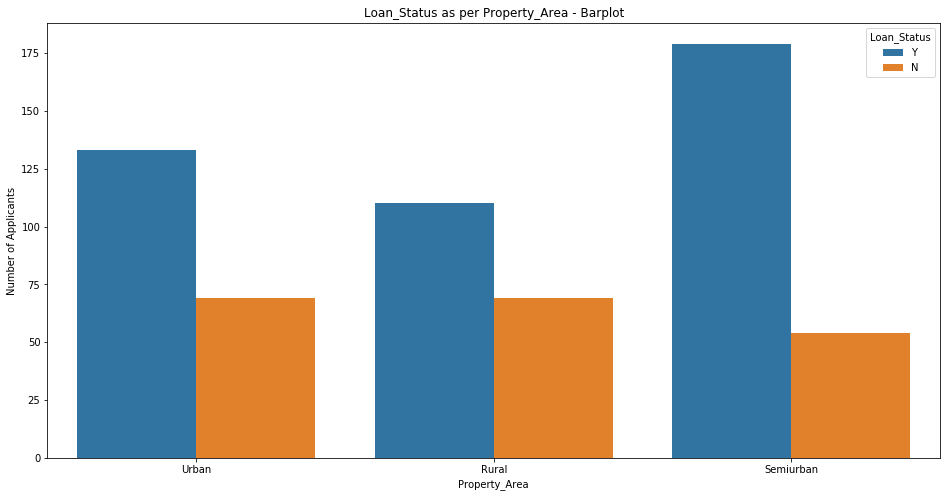

In [24]:
plt.figure(figsize=(16,8))
sns.countplot(x="Property_Area",hue="Loan_Status", data = df)
plt.ylabel('Number of Applicants')
plt.title('Loan_Status as per Property_Area - Barplot')

Most of the loan requests were granted against semiurban properties, highest fraction of loan requests were rejected against rural properties

Text(0.5, 1.0, 'Loan_Status as per Credit_History - Barplot')

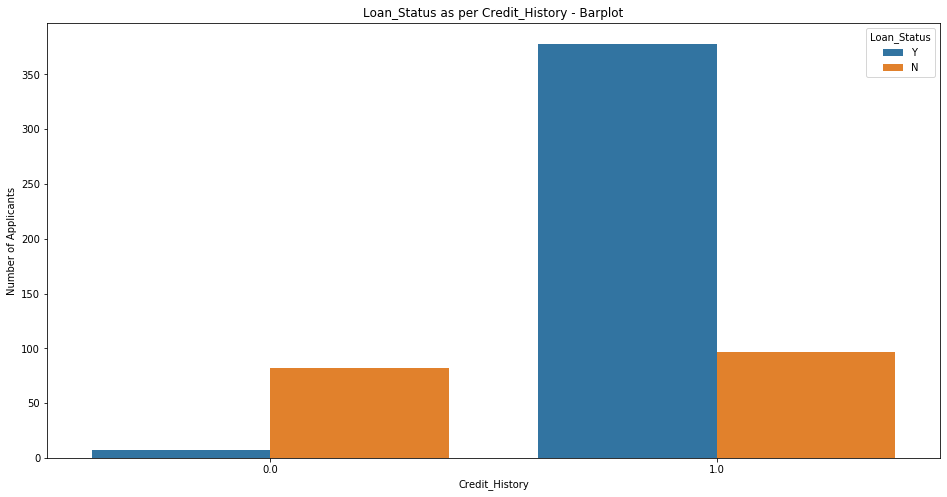

In [25]:
plt.figure(figsize=(16,8))
sns.countplot(x="Credit_History",hue="Loan_Status", data = df)
plt.ylabel('Number of Applicants')
plt.title('Loan_Status as per Credit_History - Barplot')

Very few loan requests were granted to applicants with credit history '0' and most loans were granted to applicants with credit history 1

Text(0.5, 1.0, 'Loan_Amount_Term as per Loan_Status - Barplot')

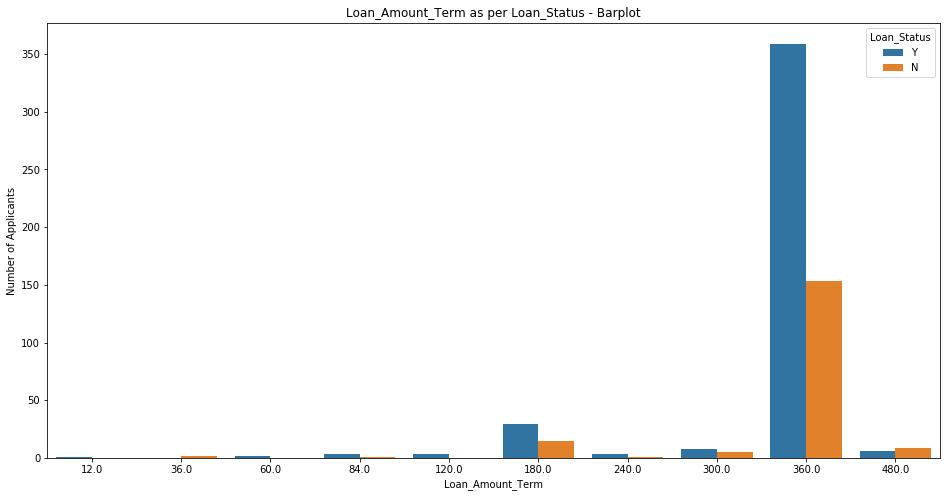

In [26]:
plt.figure(figsize=(16,8))
sns.countplot(x="Loan_Amount_Term",hue="Loan_Status", data = df)
plt.ylabel('Number of Applicants')
plt.title('Loan_Amount_Term as per Loan_Status - Barplot')

The above plot shows that loan period alone can not predict whether to grant a loan or not

Text(0.5, 1.0, 'Loan_Status vs Loan_Amount Boxplot')

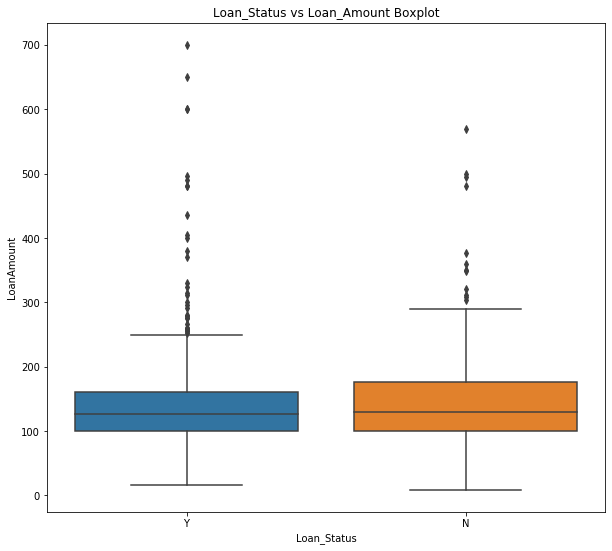

In [28]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Loan_Status", y="LoanAmount",data=df)
plt.title('Loan_Status vs Loan_Amount Boxplot')

The above plot shows that loan amount alone can not predict whether to grant a loan or not

Text(0.5, 1.0, 'Loan_Status vs Coapplicant_Income Boxplot')

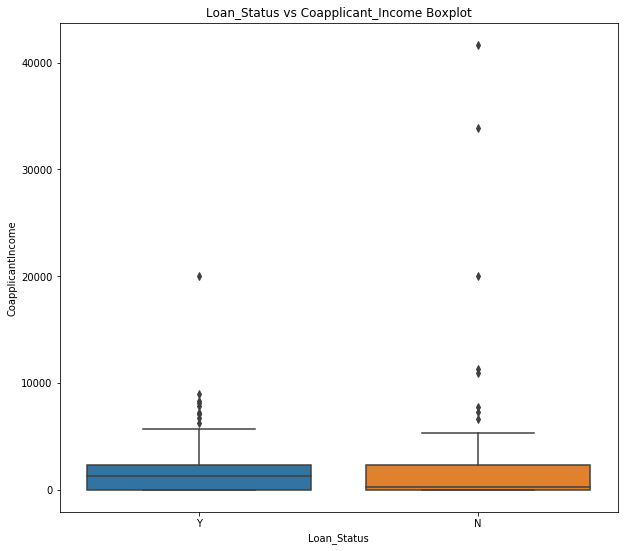

In [29]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Loan_Status", y="CoapplicantIncome",data=df)
plt.title('Loan_Status vs Coapplicant_Income Boxplot')

The above plot shows that loan was preferably granted to those cases where the median coapplicant income was relatively higher

Text(0.5, 1.0, 'Loan_Status vs Applicant_Income Boxplot')

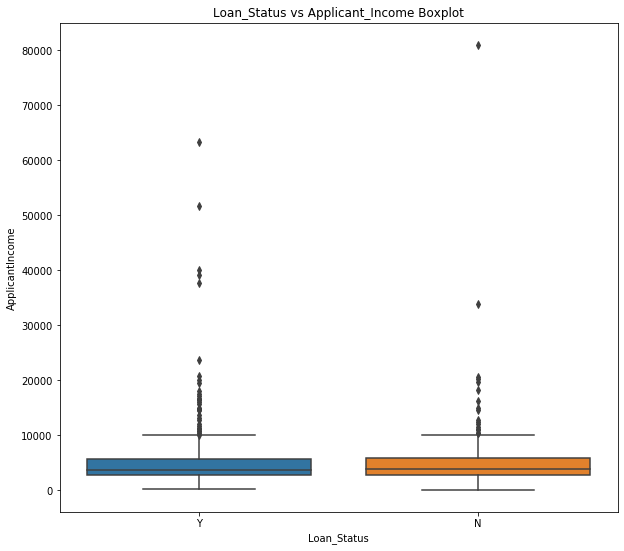

In [31]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Loan_Status", y="ApplicantIncome",data=df)
plt.title('Loan_Status vs Applicant_Income Boxplot')

The above plot shows that applicant income alone is not enough to decide whether to grant a loan or not

Text(0.5, 1.0, 'Self_Employed (Yes/No) as per Loan_Status - Barplot')

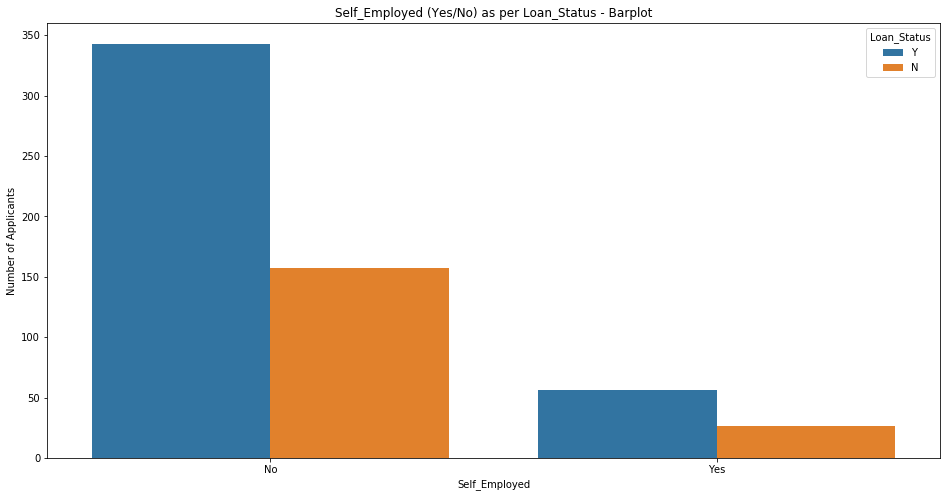

In [32]:
plt.figure(figsize=(16,8))
sns.countplot(x="Self_Employed",hue="Loan_Status", data = df)
plt.ylabel('Number of Applicants')
plt.title('Self_Employed (Yes/No) as per Loan_Status - Barplot')

The above plot shows that loan can't be granted just on the basis of whether the applicant is self employed or not, as in both cases almost one third of loans were rejected

Text(0.5, 1.0, 'Education level as per Loan_Status - Barplot')

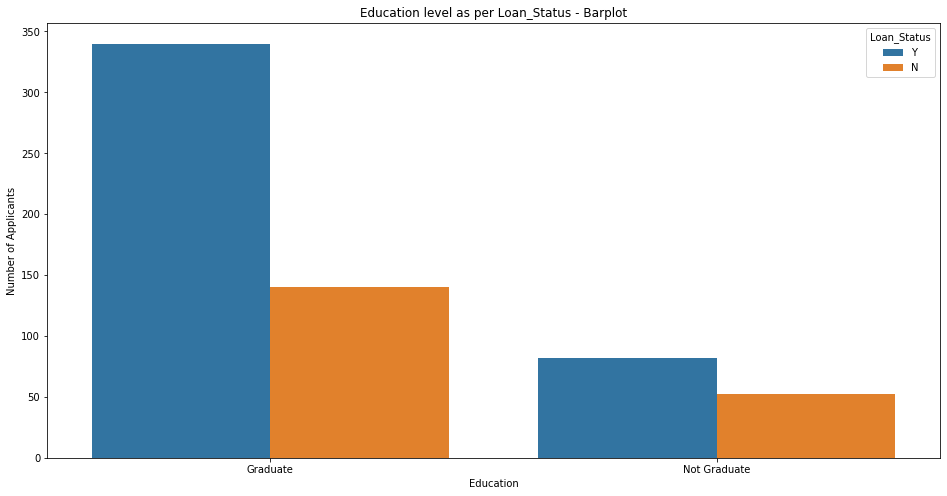

In [33]:
plt.figure(figsize=(16,8))
sns.countplot(x="Education",hue="Loan_Status", data = df)
plt.ylabel('Number of Applicants')
plt.title('Education level as per Loan_Status - Barplot')

In [34]:
The fraction of loans rejected for non graduates were relatively higher than for graduates

SyntaxError: invalid syntax (<ipython-input-34-fd3b8135eae1>, line 1)

Text(0.5, 1.0, 'Dependents as per Loan_Status - Barplot')

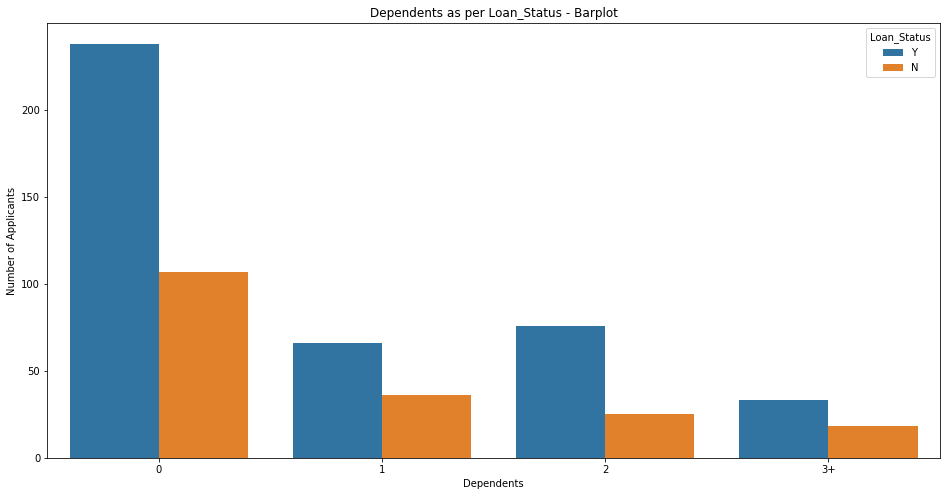

In [35]:
plt.figure(figsize=(16,8))
sns.countplot(x="Dependents",hue="Loan_Status", data = df)
plt.ylabel('Number of Applicants')
plt.title('Dependents as per Loan_Status - Barplot')

The fraction of loans rejected were highest for appicants with 3+ dependents

Text(0.5, 1.0, 'Marital Status as per Loan_Status - Barplot')

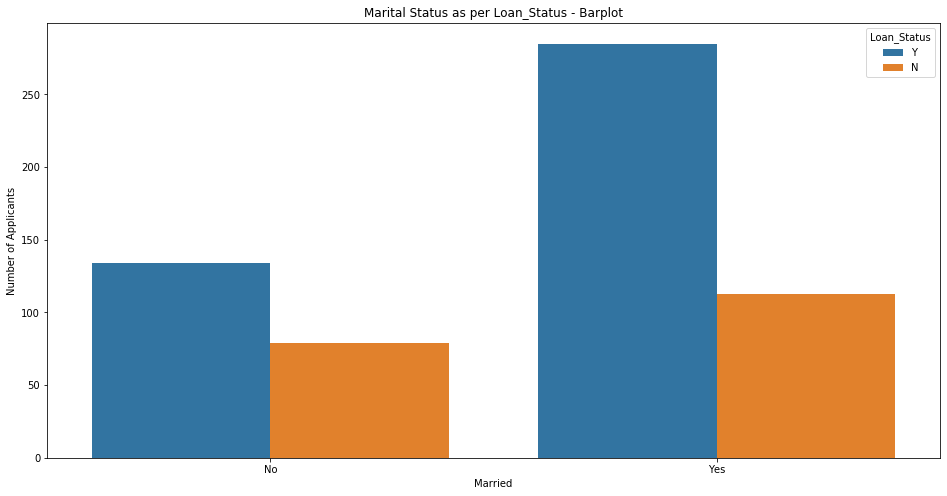

In [36]:
plt.figure(figsize=(16,8))
sns.countplot(x="Married",hue="Loan_Status", data = df)
plt.ylabel('Number of Applicants')
plt.title('Marital Status as per Loan_Status - Barplot')

The fraction of loans rejectd were higher for unmarried applicants

Text(0.5, 1.0, 'Gender as per Loan_Status - Barplot')

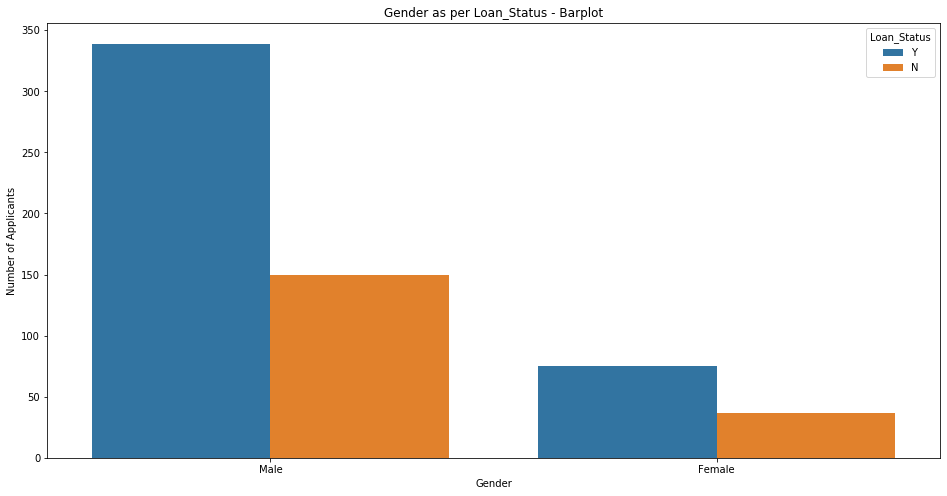

In [37]:
plt.figure(figsize=(16,8))
sns.countplot(x="Gender",hue="Loan_Status", data = df)
plt.ylabel('Number of Applicants')
plt.title('Gender as per Loan_Status - Barplot')

From the above plot we can say that loan approval does not depend on gender of applicant

In [38]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [39]:
#Let's look at the null values present in the dataset
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

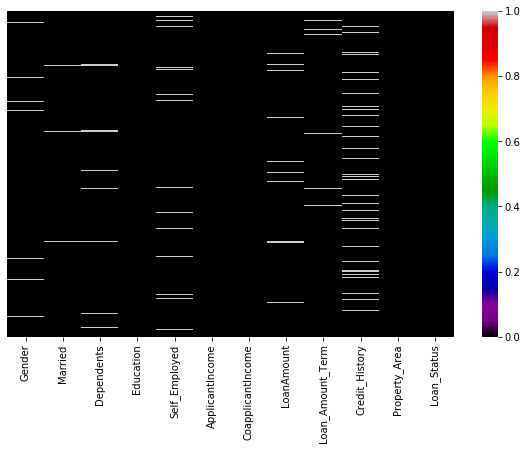

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cmap="nipy_spectral")

In [41]:
df.shape

(614, 12)

In [42]:
#Let's drop all the null value rows
df.dropna(inplace=True)
df.shape

(480, 12)

In [68]:
df.skew()

ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Loan_Status         -0.832681
dtype: float64

In [69]:
from scipy.stats import zscore
z = np.abs(zscore(df[["ApplicantIncome","CoapplicantIncome","LoanAmount"]]))
z

array([[0.13796959, 0.02795204, 0.20808917],
       [0.4175358 , 0.604633  , 0.97900085],
       [0.49118022, 0.29710022, 0.30756164],
       ...,
       [0.47820635, 0.51285354, 1.34616826],
       [0.39184635, 0.604633  , 0.52552034],
       [0.13796959, 0.604633  , 0.14591887]])

In [70]:
df = df[(z<3).all(axis=1)]
df.shape

(462, 12)

In [71]:
df.skew()

ApplicantIncome      2.000580
CoapplicantIncome    1.411017
LoanAmount           1.025425
Loan_Amount_Term    -2.298748
Credit_History      -2.022793
Loan_Status         -0.871210
dtype: float64

Let us encode categorical features for the model

In [72]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["Loan_Status"] = le.fit_transform(df["Loan_Status"].astype('str'))
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [73]:
cat = pd.get_dummies(df)
cat

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


In [74]:
cat.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

Let's drop unneccesary columns, which are already reflected in other associated columns

In [75]:
cat.drop(["Gender_Female","Married_No","Dependents_0","Education_Graduate","Self_Employed_No","Property_Area_Rural"],axis=1,inplace=True)

In [76]:
cat.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [77]:
cat.shape

(462, 15)

In [78]:
X=cat.drop("Loan_Status", axis=1)
y=cat["Loan_Status"]

In [79]:
#Scaling
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[-0.05194577,  0.06625727, -0.13226572, ..., -0.39002526,
        -0.80257592, -0.68313005],
       [-0.58201873, -0.83783418, -1.18261763, ...,  2.56393652,
        -0.80257592,  1.46385011],
       [-0.7216526 ,  0.57585789, -0.267795  , ..., -0.39002526,
        -0.80257592,  1.46385011],
       ...,
       [ 1.11635781, -0.69394695,  1.98537926, ..., -0.39002526,
        -0.80257592,  1.46385011],
       [ 0.95261449, -0.83783418,  0.86726271, ..., -0.39002526,
        -0.80257592,  1.46385011],
       [-0.05194577, -0.83783418, -0.04755992, ...,  2.56393652,
         1.24598804, -0.68313005]])

Let's do Principal Component Analysis (PCA) for the input features

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X2)
X_pca = pca.transform(X2)
print("Original shape: {}".format(str(X2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (462, 14)
Reduced shape: (462, 2)


Text(0, 0.5, 'Principal components')

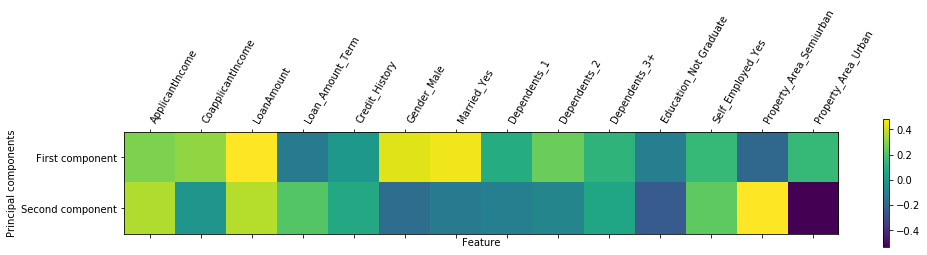

In [81]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(X.columns)),
X.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Finding the best random state

In [82]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_accuracy_score=0
for r_state in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=r_state)
    logr = LogisticRegression()
    logr.fit(X_train,y_train)
    y_pred = logr.predict(X_test)
    accu_scr = accuracy_score(y_test,y_pred)
    if accu_scr>max_accuracy_score:
        max_accuracy_score = accu_scr
        final_r_state = r_state
    
print("max accuracy score corresponding to random state",final_r_state,"is",max_accuracy_score)

max accuracy score corresponding to random state 22 is 0.8924731182795699


In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=22)

In [84]:
print(X_train.shape,"\n",X_test.shape)

(369, 14) 
 (93, 14)


Observing performance of different classifier algorithms

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [123]:
LR = LogisticRegression(C=10)#From the GridSearchCVparameter tuning
KNN = KNeighborsClassifier()#(n_neighbors=2)
GNB = GaussianNB()
#MNB = MultinomialNB()
SV = SVC()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier(n_estimators=383)#From the GridSearchCVparameter tuning
ABC = AdaBoostClassifier()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingClassifier()
XGB = xgb.XGBClassifier()

In [124]:
models = []
models.append(("LogisticRegression", LR))
models.append(("KNeighborsClassifier", KNN))
models.append(("GaussianNB", GNB))
#models.append(("MultinomialNB", MNB))
models.append(("SVC", SV))
models.append(("DecisionTreeClassifier", DTC))
models.append(("RandomForestClassifier", RFC))
models.append(("AdaBoostClassifier", ABC))
models.append(("GradientBoostingClassifier", GBC))
models.append(("XGBoostClassifier", XGB))

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=22, shuffle=True)

***************** LogisticRegression ******************

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score =  0.8924731182795699


Cross val score =  0.8117021276595745


roc_auc_score =  0.7916666666666666


Classification Report
               precision    recall  f1-score   support

           0       1.00      0.58      0.74        24
           1       0.87      1.00      0.93        69

    accuracy                           0.89        93
   macro avg       0.94      0.79      0.83        93
weighted avg       0.91      0.89      0.88        93



Confusion Matrix 
[[14 10]
 [ 0 69]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** KNeighborsClassifier ******************

KNe

Cross val score =  0.7705365402405181


roc_auc_score =  0.7626811594202898


Classification Report
               precision    recall  f1-score   support

           0       0.78      0.58      0.67        24
           1       0.87      0.94      0.90        69

    accuracy                           0.85        93
   macro avg       0.82      0.76      0.78        93
weighted avg       0.84      0.85      0.84        93



Confusion Matrix 
[[14 10]
 [ 4 65]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





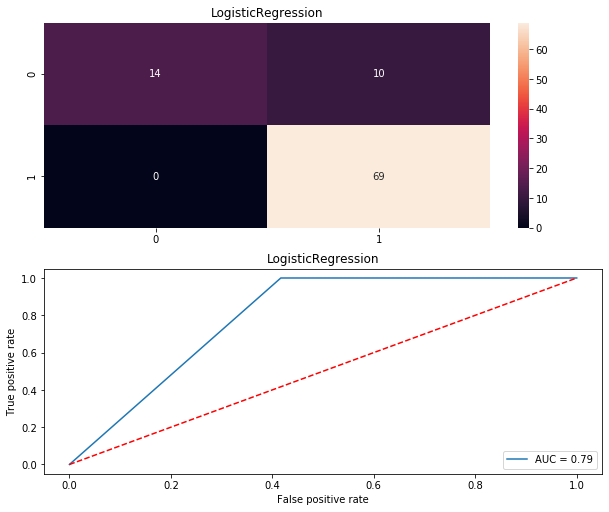

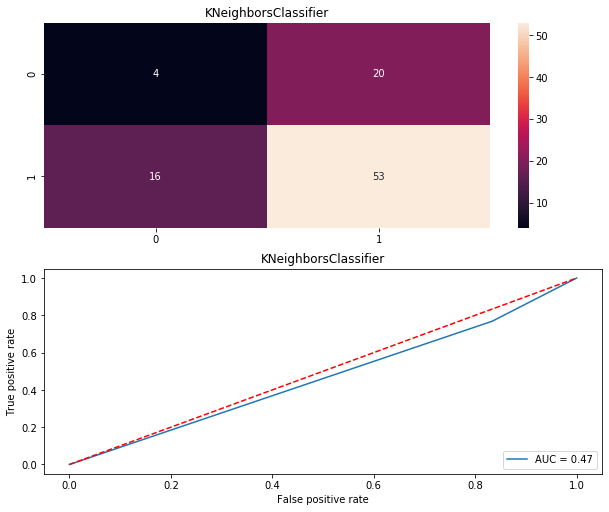

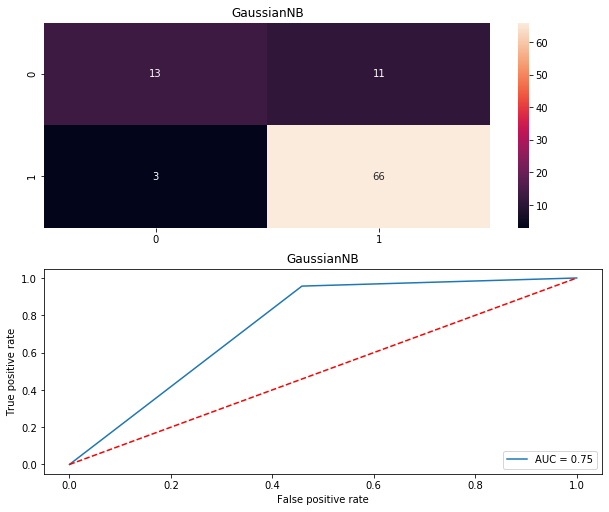

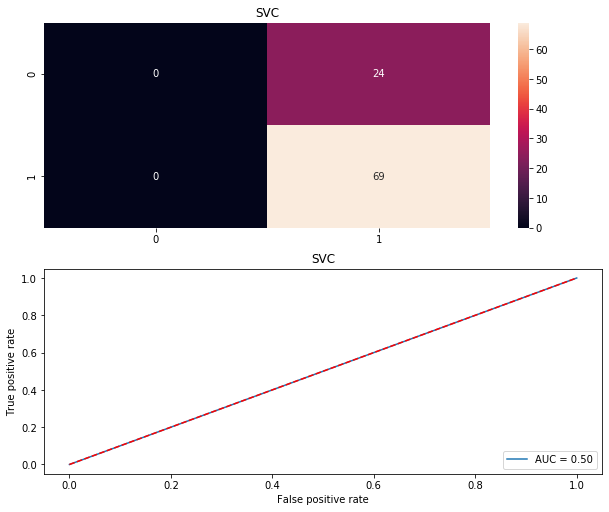

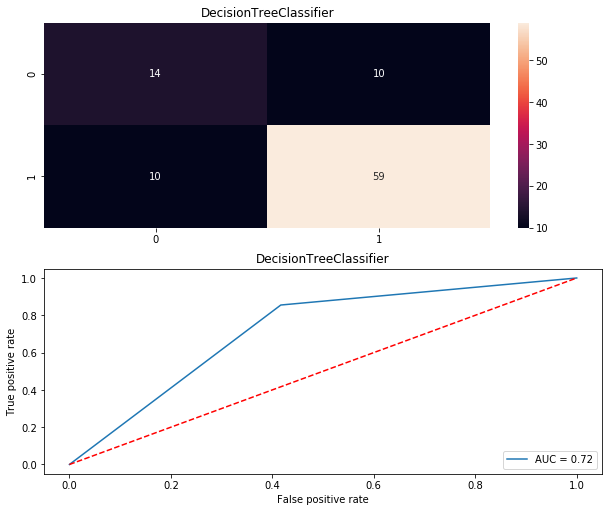

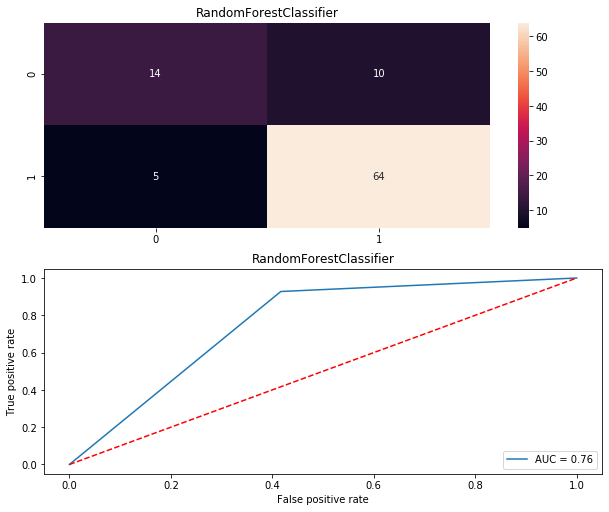

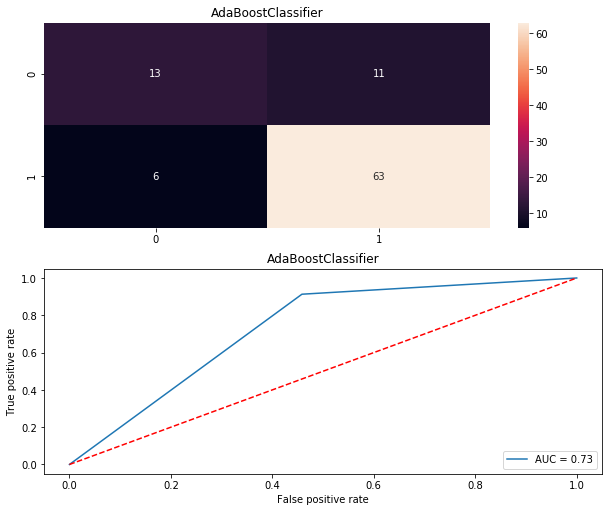

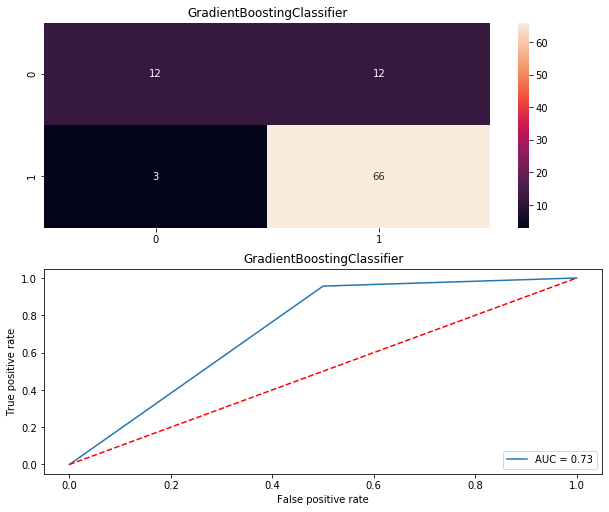

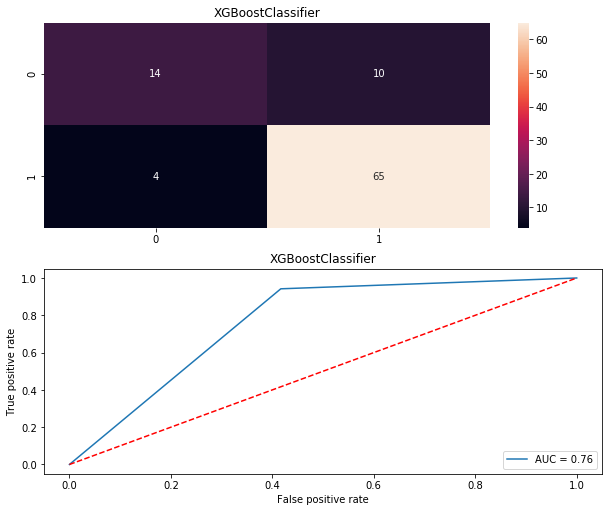

In [126]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    AS = accuracy_score(y_test,pre)
    print("Accuracy Score = ",AS)
    score.append(AS*100)
    print("\n")
    sc = cross_val_score(model,X,y,cv=10,scoring="accuracy").mean()
    print("Cross val score = ",sc)
    cvs.append(sc*100)
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print("Classification Report\n", classification_report(y_test,pre))
    print("\n")
    cm = confusion_matrix(y_test,pre)
    print("Confusion Matrix \n{}".format(cm))
    print("\n")
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")

In [106]:
result = pd.DataFrame({"Model": Model, "Accuracy Socre": score, "Cross val score": cvs, 'ROC AUC Curve': rocscore})
result

,Model,Accuracy Socre,Cross val score,ROC AUC Curve
0,LogisticRegression,89.247312,81.170213,79.166667
1,KNeighborsClassifier,61.290323,65.134135,46.739130
2,GaussianNB,84.946237,80.305273,74.909420
3,SVC,74.193548,69.912118,50.000000
4,DecisionTreeClassifier,79.569892,73.617021,72.644928
5,RandomForestClassifier,84.946237,80.300648,74.909420
6,AdaBoostClassifier,81.720430,78.358002,72.735507
7,GradientBoostingClassifier,83.870968,77.497687,72.826087
8,XGBoostClassifier,84.946237,77.053654,76.268116


From the above table, clarly the Logistic Regression model is giving the beast accuracy score and generalization performance

In [91]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'C': [6,7,8,9]
             }
grid = GridSearchCV(estimator=LR,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.C)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=8, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.785857089966679
6
{'C': 6}


Let's select best parameter for the next best model i.e. RandomForestClassifier: Hyperparameter tuning using GridsearchCV

In [80]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [381,382,383,384]
             }
grid = GridSearchCV(estimator=RFC,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [127]:
from sklearn.externals import joblib
joblib.dump(LR,'Fraud_Loan_Prediction.pkl')

['Fraud_Loan_Prediction.pkl']